<a href="https://colab.research.google.com/github/yeesem/Machine-Learning/blob/main/Decision_Tree_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/yeesem/Machine-Learning-Datasets/main/kyphosis.csv')

In [22]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [41]:
#Inbalance data
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

<Axes: xlabel='Kyphosis', ylabel='count'>

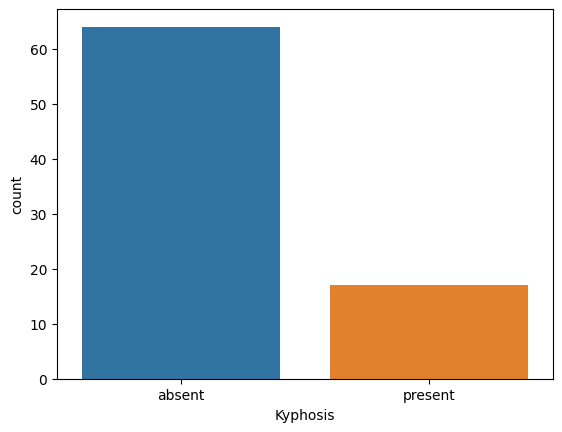

In [8]:
sns.countplot(x='Kyphosis',data=df)

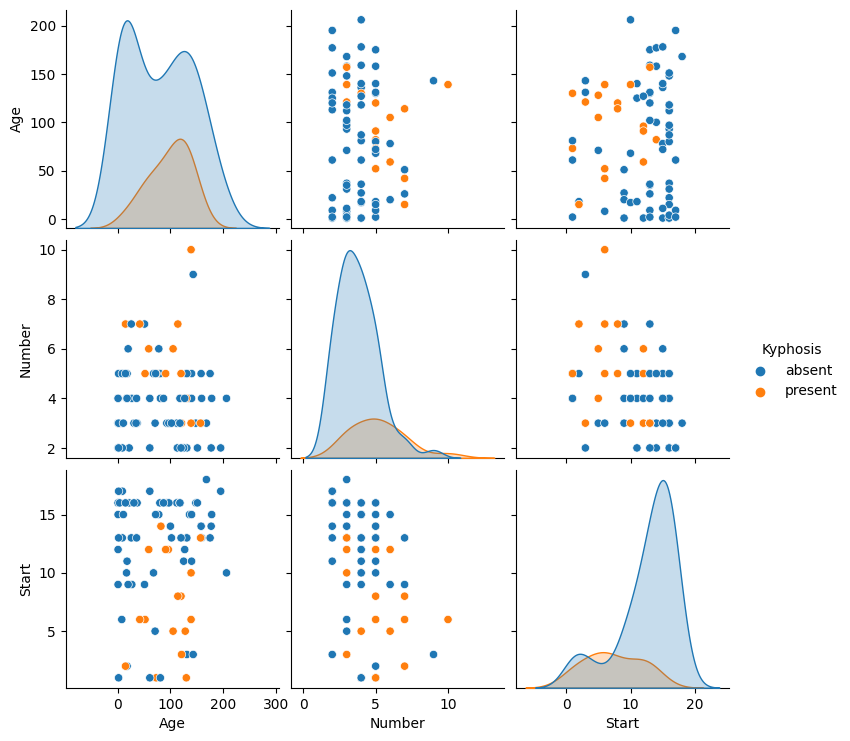

In [10]:
sns.pairplot(df,hue='Kyphosis')

In [11]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier()

In [27]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [28]:
prediction = dtree.predict(X_test)

In [46]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot


In [48]:
features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

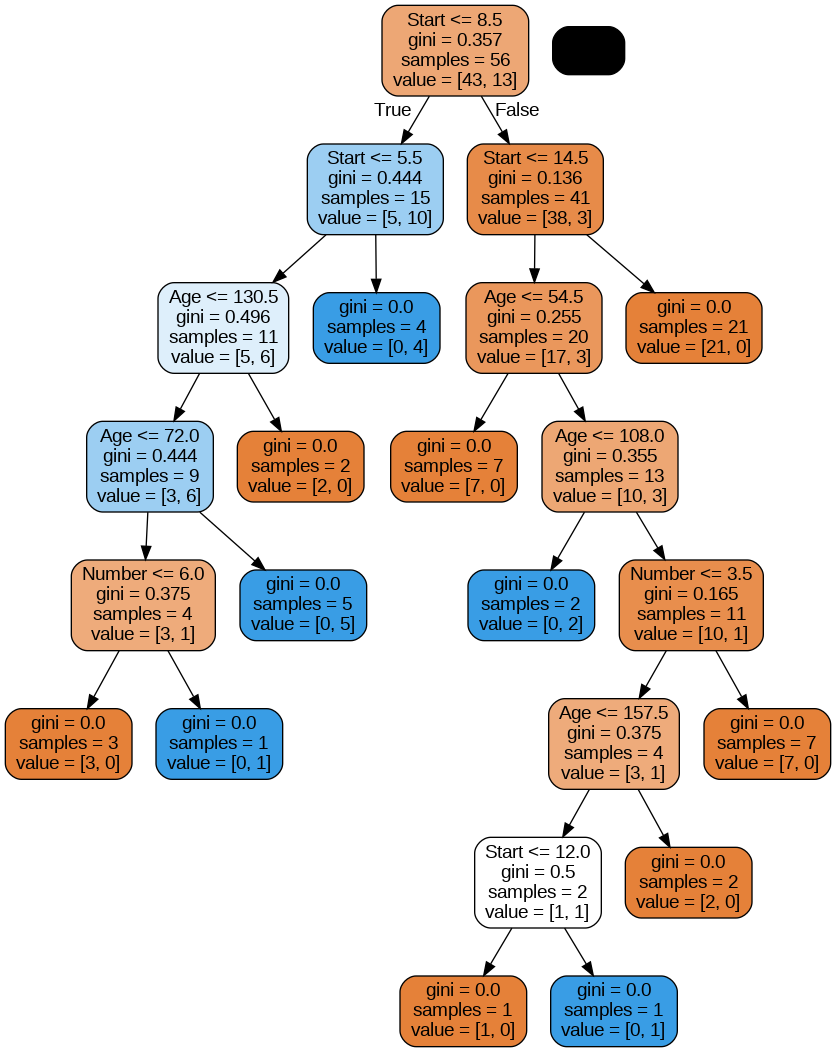

In [50]:
dot_data =StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


In [29]:
from sklearn.metrics import confusion_matrix,classification_report

In [30]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test,prediction))

[[15  6]
 [ 1  3]]


              precision    recall  f1-score   support

      absent       0.94      0.71      0.81        21
     present       0.33      0.75      0.46         4

    accuracy                           0.72        25
   macro avg       0.64      0.73      0.64        25
weighted avg       0.84      0.72      0.75        25



In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(n_estimators=200)

In [34]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [35]:
pred = rfc.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

In [39]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[18  3]
 [ 3  1]]


              precision    recall  f1-score   support

      absent       0.86      0.86      0.86        21
     present       0.25      0.25      0.25         4

    accuracy                           0.76        25
   macro avg       0.55      0.55      0.55        25
weighted avg       0.76      0.76      0.76        25



# **Exercise**

In [53]:
loans = pd.read_csv('https://raw.githubusercontent.com/yeesem/Machine-Learning-Datasets/main/loan_data.csv')

In [54]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [55]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [56]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


**Exploratory Data Analysis**

<Axes: xlabel='not.fully.paid', ylabel='count'>

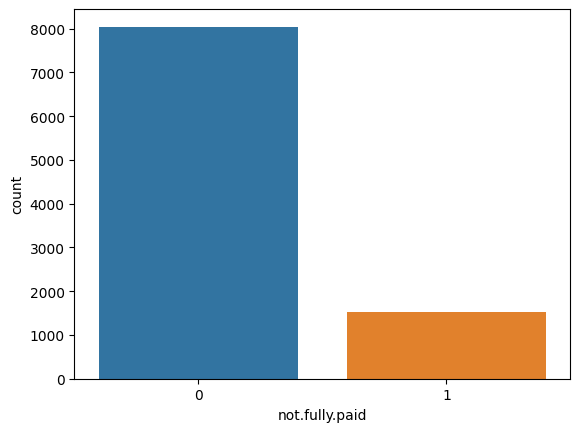

In [76]:
sns.countplot(x = 'not.fully.paid',data=loans)

<Axes: xlabel='fico', ylabel='Count'>

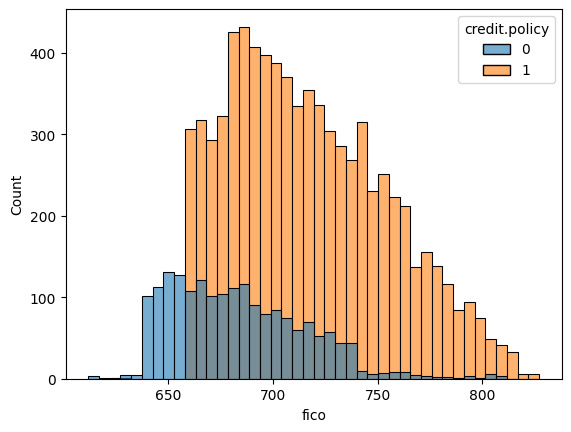

In [63]:
sns.histplot(x='fico',data=loans,hue = 'credit.policy',alpha=0.6)

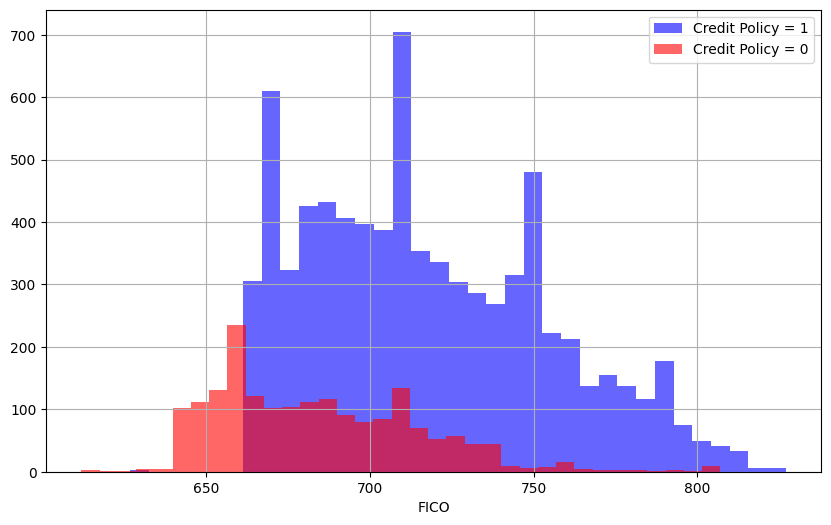

In [68]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35,color='blue',label = 'Credit Policy = 1',
                                       alpha = 0.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35,color='red',label = 'Credit Policy = 0',
                                       alpha = 0.6)
plt.legend()
plt.xlabel('FICO')
plt.show()

In [69]:
loans['not.fully.paid'].unique()

array([0, 1])

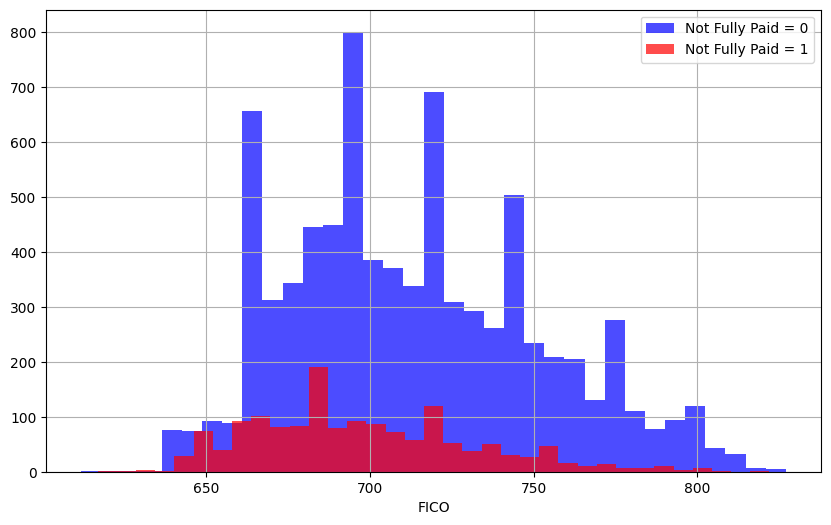

In [71]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35,color='blue',label = 'Not Fully Paid = 0',
                                               alpha = 0.7)
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35,color='red',label = 'Not Fully Paid = 1',
                                               alpha = 0.7)
plt.legend()
plt.xlabel('FICO')
plt.show()

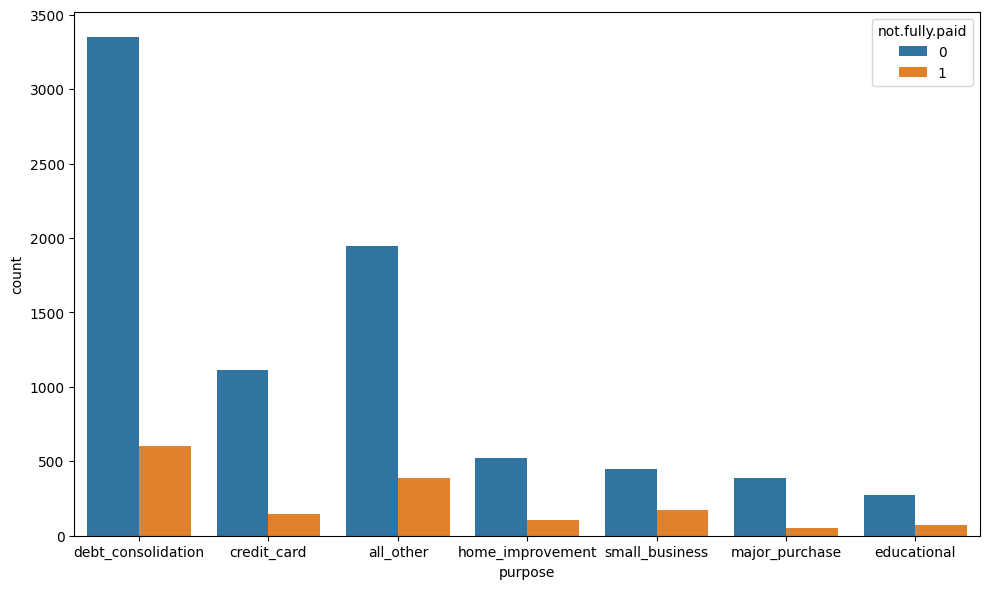

In [75]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',data=loans,hue = 'not.fully.paid')
plt.tight_layout()

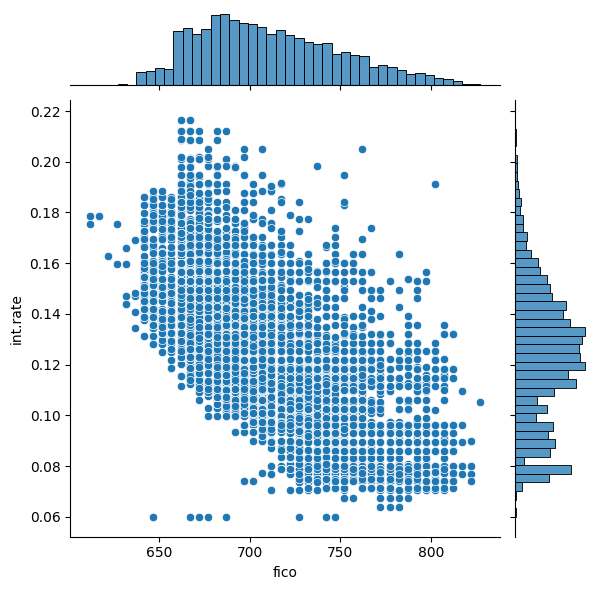

In [79]:
sns.jointplot(x = 'fico',y='int.rate',data=loans)

<Figure size 1100x700 with 0 Axes>

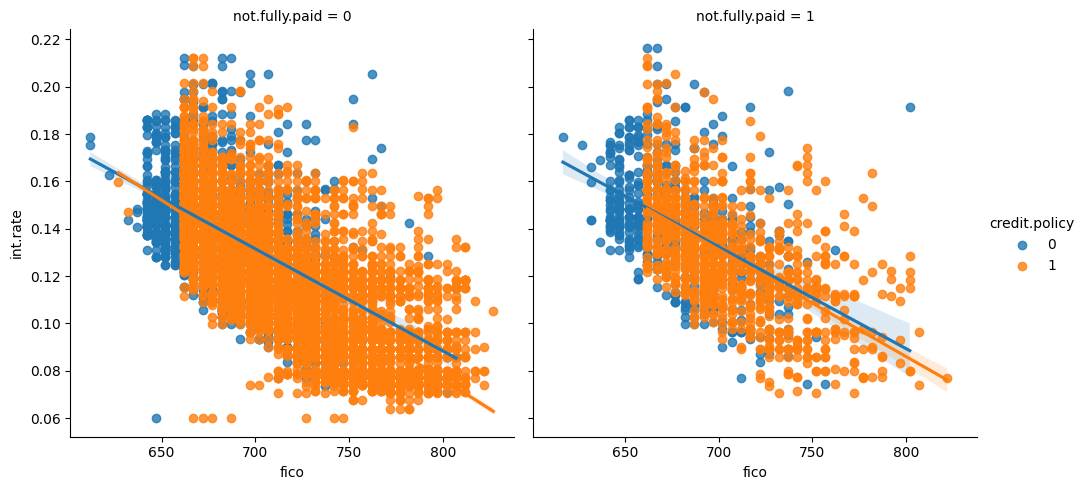

In [84]:
plt.figure(figsize=(11,7))
sns.lmplot(y = 'int.rate',x='fico',data=loans,hue='credit.policy',
           col = 'not.fully.paid')

#Behaviours are almost the same

**Setting up the data**

In [85]:
cat_feat = ['purpose']

In [86]:
final_data = pd.get_dummies(loans,columns=cat_feat,drop_first=True)

In [87]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [88]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


**Train Test Split**

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X = final_data.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3 ,random_state=101)

**Training a Decision Tree Model**

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dtree = DecisionTreeClassifier()

In [93]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Predictions and Evaluations of Decision Tree**

In [95]:
prediction = dtree.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix,classification_report

In [97]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [98]:
print(confusion_matrix(y_test,prediction))

[[1982  449]
 [ 341  102]]


**Training a Random Forest Model**

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rfc = RandomForestClassifier(n_estimators=300)

In [103]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

**Predictions and Evaluations**

In [104]:
prediction = rfc.predict(X_test)

In [105]:
print(confusion_matrix(y_test,prediction))

[[2421   10]
 [ 431   12]]


In [106]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.55      0.03      0.05       443

    accuracy                           0.85      2874
   macro avg       0.70      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874

